In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e1/sample_submission.csv
/kaggle/input/playground-series-s5e1/train.csv
/kaggle/input/playground-series-s5e1/test.csv


## Import Libraries

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
train = pd.read_csv('/kaggle/input/playground-series-s5e1/train.csv')
print("==== train data ====")
print(train.head())
test = pd.read_csv('/kaggle/input/playground-series-s5e1/test.csv')
print('\n')
print("==== test data ====")
print(test.head())

==== train data ====
   id        date country              store             product  num_sold
0   0  2010-01-01  Canada  Discount Stickers   Holographic Goose       NaN
1   1  2010-01-01  Canada  Discount Stickers              Kaggle     973.0
2   2  2010-01-01  Canada  Discount Stickers        Kaggle Tiers     906.0
3   3  2010-01-01  Canada  Discount Stickers            Kerneler     423.0
4   4  2010-01-01  Canada  Discount Stickers  Kerneler Dark Mode     491.0


==== test data ====
       id        date country              store             product
0  230130  2017-01-01  Canada  Discount Stickers   Holographic Goose
1  230131  2017-01-01  Canada  Discount Stickers              Kaggle
2  230132  2017-01-01  Canada  Discount Stickers        Kaggle Tiers
3  230133  2017-01-01  Canada  Discount Stickers            Kerneler
4  230134  2017-01-01  Canada  Discount Stickers  Kerneler Dark Mode


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


## Train data 
- check columns and their classes

In [8]:
train_cols = train.columns.to_list()
print(train_cols)

['id', 'date', 'country', 'store', 'product', 'num_sold']


Check for missing values

In [10]:
for i in train_cols:
    print(f'{i}:{train[i].isna().sum()}')

id:0
date:0
country:0
store:0
product:0
num_sold:8871


Unique values

In [7]:
for i in train_cols:
    print(f'{i}:{len(train[i].unique())}')

id:230130
date:2557
country:6
store:3
product:5
num_sold:4038


In [11]:
train.dtypes

id            int64
date         object
country      object
store        object
product      object
num_sold    float64
dtype: object

In [12]:
print(f'{train.country.unique()}')
print(f'{train.store.unique()}')
print(train['product'].unique())

['Canada' 'Finland' 'Italy' 'Kenya' 'Norway' 'Singapore']
['Discount Stickers' 'Stickers for Less' 'Premium Sticker Mart']
['Holographic Goose' 'Kaggle' 'Kaggle Tiers' 'Kerneler'
 'Kerneler Dark Mode']


## Test Data

In [13]:
test_cols = test.columns.to_list()
print(test_cols)

['id', 'date', 'country', 'store', 'product']


In [14]:
for i in test_cols:
    print(f'{i}:{test[i].isna().sum()}')

id:0
date:0
country:0
store:0
product:0


In [15]:
for i in test_cols:
    print(f'{i}:{len(test[i].unique())}')

id:98550
date:1095
country:6
store:3
product:5


In [16]:
print(f'{test.country.unique()}')
print(f'{test.store.unique()}')
print(test['product'].unique())

['Canada' 'Finland' 'Italy' 'Kenya' 'Norway' 'Singapore']
['Discount Stickers' 'Stickers for Less' 'Premium Sticker Mart']
['Holographic Goose' 'Kaggle' 'Kaggle Tiers' 'Kerneler'
 'Kerneler Dark Mode']


In [17]:
test.dtypes

id          int64
date       object
country    object
store      object
product    object
dtype: object

## Preprocessing : Train

In [15]:
train_preprocess = train.copy()

In [16]:
train_preprocess['date'] = pd.to_datetime(train_preprocess['date'].to_list())

In [17]:
train_preprocess.dtypes

id                   int64
date        datetime64[ns]
country             object
store               object
product             object
num_sold           float64
dtype: object

In [18]:
train_preprocess.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


Encoding
> country:6
> 
> store:3
> 
> product:5


In [19]:
from sklearn import preprocessing

label_encoder_country = preprocessing.LabelEncoder()
train_preprocess['country']= label_encoder_country.fit_transform(train_preprocess['country'])

In [20]:
label_encoder_store = preprocessing.LabelEncoder()
train_preprocess['store']= label_encoder_store.fit_transform(train_preprocess['store'])

In [21]:
label_encoder_product = preprocessing.LabelEncoder()
train_preprocess['product']= label_encoder_product.fit_transform(train_preprocess['product'])

In [22]:
train_preprocess

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,date,country,store,product,num_sold
0,0,2010-01-01,0,0,0,NaN
1,1,2010-01-01,0,0,1,973.0
2,2,2010-01-01,0,0,2,906.0
3,3,2010-01-01,0,0,3,423.0
4,4,2010-01-01,0,0,4,491.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,5,1,0,466.0
230126,230126,2016-12-31,5,1,1,2907.0
230127,230127,2016-12-31,5,1,2,2299.0
230128,230128,2016-12-31,5,1,3,1242.0


Handle Missing Values

In [23]:
train_preprocess.num_sold.isna().sum()

8871

In [24]:
train_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id        230130 non-null  int64         
 1   date      230130 non-null  datetime64[ns]
 2   country   230130 non-null  int64         
 3   store     230130 non-null  int64         
 4   product   230130 non-null  int64         
 5   num_sold  221259 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 10.5 MB


In [25]:
print(train_preprocess['date'][0])
print(train['date'][0])

2010-01-01 00:00:00
2010-01-01


In [26]:
#train_preprocess['date'][0]
train_preprocess['date'] = pd.to_datetime(train_preprocess['date']).dt.date

In [27]:
print(train_preprocess['date'][0])

2010-01-01


## Preprocessing : Test

In [93]:
test_preprocess = test.copy()

In [94]:
test_preprocess['date'] = pd.to_datetime(test_preprocess['date'].to_list())
test_preprocess['country']= label_encoder_country.fit_transform(test_preprocess['country'])
test_preprocess['store']= label_encoder_store.fit_transform(test_preprocess['store'])
test_preprocess['product']= label_encoder_product.fit_transform(test_preprocess['product'])
test_preprocess['date'] = pd.to_datetime(test_preprocess['date']).dt.date
test_preprocess['year'] = pd.to_datetime(test_preprocess['date']).dt.year
test_preprocess['month'] = pd.to_datetime(test_preprocess['date']).dt.month
test_preprocess['day'] = pd.to_datetime(test_preprocess['date']).dt.day

In [95]:
test_preprocess

,id,date,country,store,product,year,month,day
0,230130,2017-01-01,0,0,0,2017,1,1
1,230131,2017-01-01,0,0,1,2017,1,1
2,230132,2017-01-01,0,0,2,2017,1,1
3,230133,2017-01-01,0,0,3,2017,1,1
4,230134,2017-01-01,0,0,4,2017,1,1
...,...,...,...,...,...,...,...,...
98545,328675,2019-12-31,5,1,0,2019,12,31
98546,328676,2019-12-31,5,1,1,2019,12,31
98547,328677,2019-12-31,5,1,2,2019,12,31
98548,328678,2019-12-31,5,1,3,2019,12,31


In [96]:
test_preprocess['date'] = pd.to_datetime(test_preprocess['date'].to_list())
test_preprocess['day_of_week'] = test_preprocess["date"].dt.dayofweek

In [97]:
test_preprocess.head()

,id,date,country,store,product,year,month,day,day_of_week
0,230130,2017-01-01,0,0,0,2017,1,1,6
1,230131,2017-01-01,0,0,1,2017,1,1,6
2,230132,2017-01-01,0,0,2,2017,1,1,6
3,230133,2017-01-01,0,0,3,2017,1,1,6
4,230134,2017-01-01,0,0,4,2017,1,1,6


In [98]:
test_preprocess = test_preprocess.drop('date',axis=1)
test_preprocess = test_preprocess.dropna()

In [99]:
test_preprocess.head()

,id,country,store,product,year,month,day,day_of_week
0,230130,0,0,0,2017,1,1,6
1,230131,0,0,1,2017,1,1,6
2,230132,0,0,2,2017,1,1,6
3,230133,0,0,3,2017,1,1,6
4,230134,0,0,4,2017,1,1,6


In [29]:
# Plot the responses for different events and regions
# sns.lineplot(x="date", y="num_sold",
#              hue="country",
#              data=train_preprocess)

In [30]:
# plt.figure(figsize=(12, 6))
# sns.lineplot(x="date", y="num_sold",
#              data=train_preprocess[train_preprocess['country']==1])

In [31]:
# plt.figure(figsize=(12, 6))
# sns.lineplot(x="date", y="num_sold",
#              data=train_preprocess[train_preprocess['country']==5])

In [32]:
# plt.figure(figsize=(12, 6))
# sns.lineplot(x="date", y="num_sold",
#              data=train_preprocess[train_preprocess['country']==3])

In [33]:
train_preprocess[train_preprocess['country']==5]

,id,date,country,store,product,num_sold
75,75,2010-01-01,5,0,0,150.0
76,76,2010-01-01,5,0,1,939.0
77,77,2010-01-01,5,0,2,768.0
78,78,2010-01-01,5,0,3,405.0
79,79,2010-01-01,5,0,4,495.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,5,1,0,466.0
230126,230126,2016-12-31,5,1,1,2907.0
230127,230127,2016-12-31,5,1,2,2299.0
230128,230128,2016-12-31,5,1,3,1242.0


In [34]:
train_preprocess['year'] = pd.to_datetime(train_preprocess['date']).dt.year

In [35]:
train_preprocess['month'] = pd.to_datetime(train_preprocess['date']).dt.month

In [36]:
train_preprocess['day'] = pd.to_datetime(train_preprocess['date']).dt.day

In [37]:
train_preprocess

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,date,country,store,product,num_sold,year,month,day
0,0,2010-01-01,0,0,0,NaN,2010,1,1
1,1,2010-01-01,0,0,1,973.0,2010,1,1
2,2,2010-01-01,0,0,2,906.0,2010,1,1
3,3,2010-01-01,0,0,3,423.0,2010,1,1
4,4,2010-01-01,0,0,4,491.0,2010,1,1
...,...,...,...,...,...,...,...,...,...
230125,230125,2016-12-31,5,1,0,466.0,2016,12,31
230126,230126,2016-12-31,5,1,1,2907.0,2016,12,31
230127,230127,2016-12-31,5,1,2,2299.0,2016,12,31
230128,230128,2016-12-31,5,1,3,1242.0,2016,12,31


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

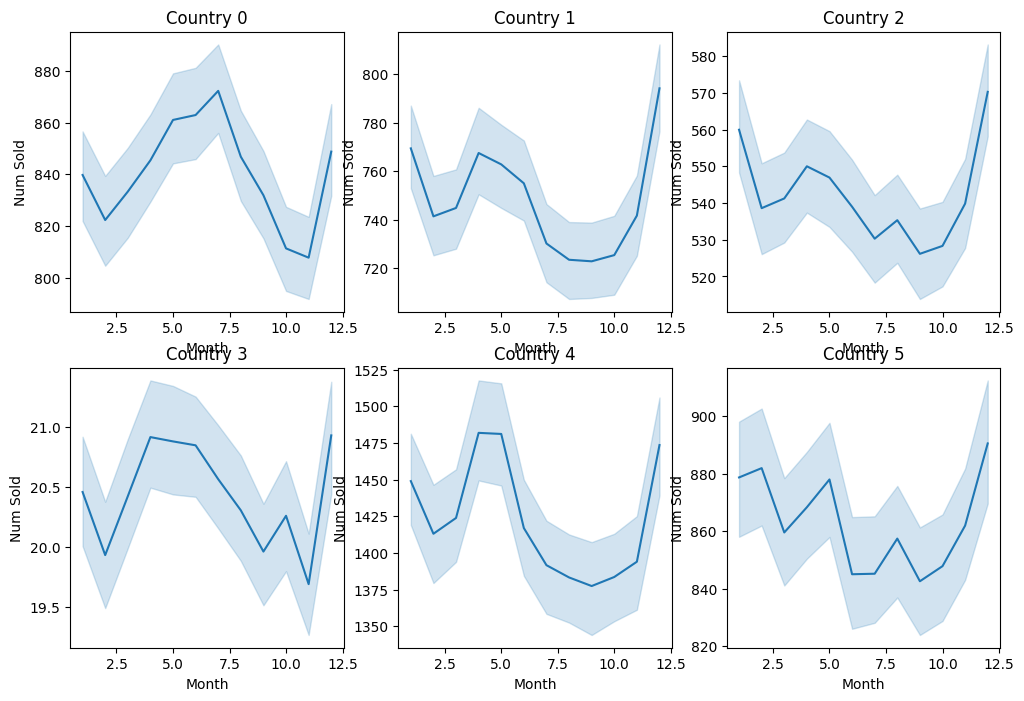

In [38]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()
for i in range(6):
    ax = axes[i]  # Get the current subplot axis
    sns.lineplot(x="month", y="num_sold", data=train_preprocess[train_preprocess['country'] == i], ax=ax)
    ax.set_title(f"Country {i}") #set title for each subplot
    ax.set_xlabel("Month") #set x label for each subplot
    ax.set_ylabel("Num Sold") #set y label for each subplot

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

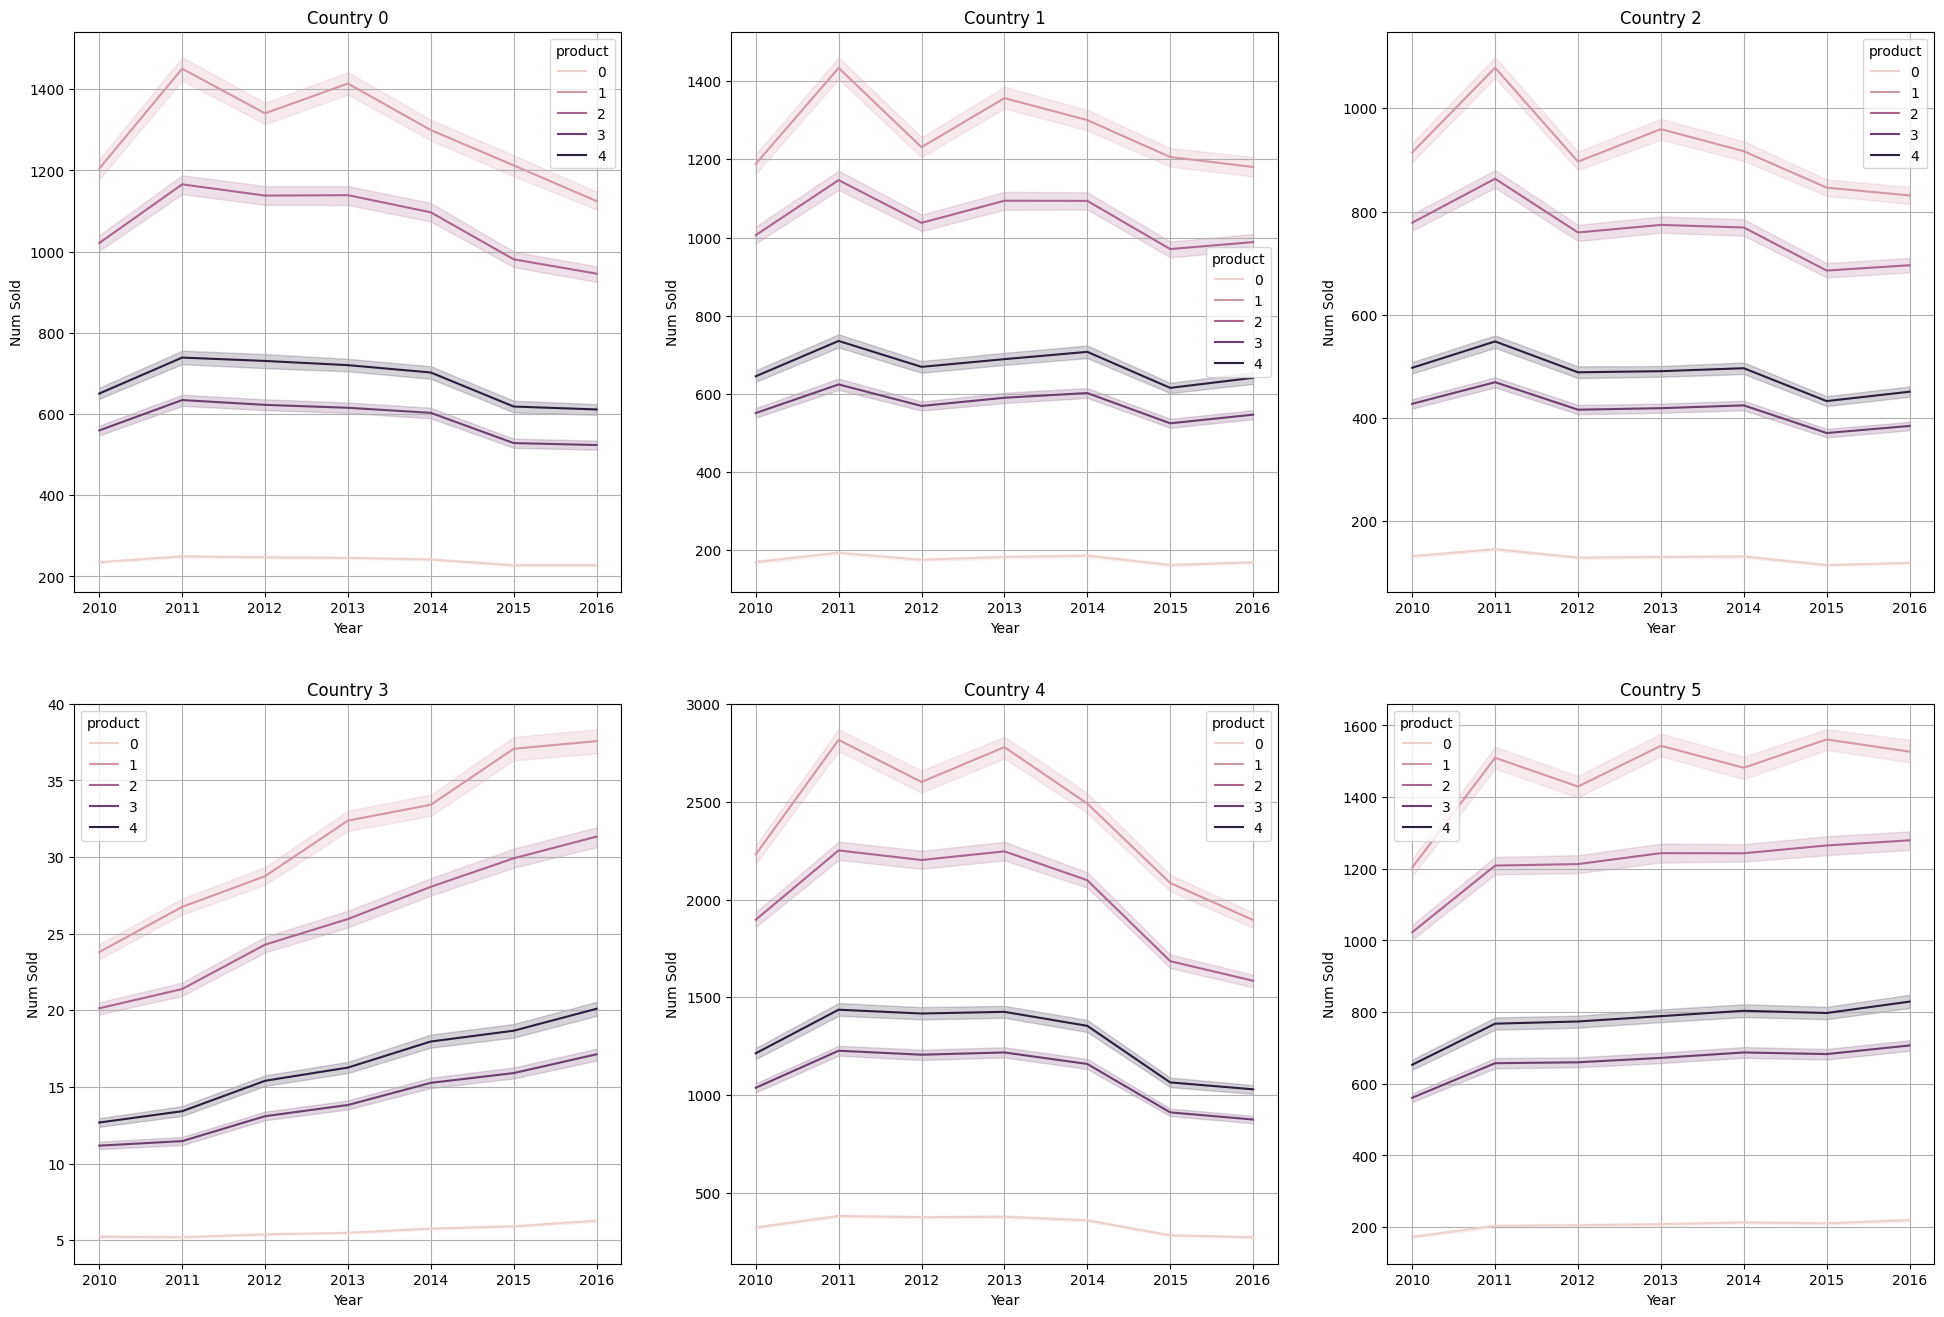

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(24, 16))
axes = axes.flatten()
for i in range(6):
    ax = axes[i]  # Get the current subplot axis
    sns.lineplot(x="year", y="num_sold",hue="product", data=train_preprocess[train_preprocess['country'] == i], ax=ax)
    ax.grid()
    ax.set_title(f"Country {i}") #set title for each subplot
    ax.set_xlabel("Year") #set x label for each subplot
    ax.set_ylabel("Num Sold") #set y label for each subplot

In [40]:
## preprocess Pipeline
def preprocess_pipeline(data_frame):
    pass

In [41]:
train_preprocess_2010 = train_preprocess[train_preprocess['year']==2010]

In [42]:
train_preprocess_2011 = train_preprocess[train_preprocess['year']==2011]

In [43]:
train_preprocess_2011.tail()

,id,date,country,store,product,num_sold,year,month,day
65695,65695,2011-12-31,5,1,0,384.0,2011,12,31
65696,65696,2011-12-31,5,1,1,2668.0,2011,12,31
65697,65697,2011-12-31,5,1,2,2520.0,2011,12,31
65698,65698,2011-12-31,5,1,3,1146.0,2011,12,31
65699,65699,2011-12-31,5,1,4,1497.0,2011,12,31


In [44]:
train_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  int64  
 3   store     230130 non-null  int64  
 4   product   230130 non-null  int64  
 5   num_sold  221259 non-null  float64
 6   year      230130 non-null  int32  
 7   month     230130 non-null  int32  
 8   day       230130 non-null  int32  
dtypes: float64(1), int32(3), int64(4), object(1)
memory usage: 13.2+ MB


In [45]:
obj_cols = ['country','store','product']
for obj in obj_cols:
    print(obj,f": {len(train_preprocess[obj].unique())}")

country : 6
store : 3
product : 5


<Axes: >

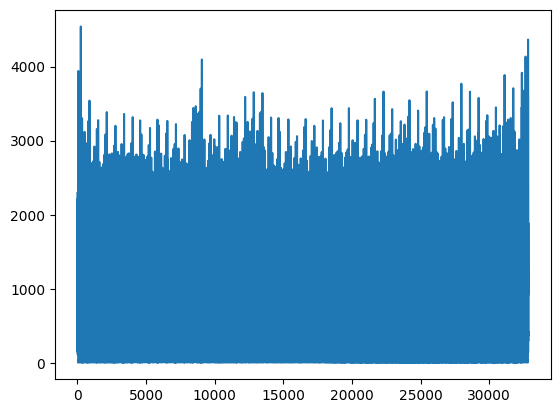

In [46]:
train_preprocess_2010['num_sold'].plot()

In [47]:
train_preprocess['date'] = pd.to_datetime(train_preprocess['date'].to_list())

In [48]:
train_preprocess['day_of_week'] = train_preprocess["date"].dt.dayofweek

In [49]:
train_preprocess.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,date,country,store,product,num_sold,year,month,day,day_of_week
0,0,2010-01-01,0,0,0,NaN,2010,1,1,4
1,1,2010-01-01,0,0,1,973.0,2010,1,1,4
2,2,2010-01-01,0,0,2,906.0,2010,1,1,4
3,3,2010-01-01,0,0,3,423.0,2010,1,1,4
4,4,2010-01-01,0,0,4,491.0,2010,1,1,4


In [50]:
train_preprocess.tail()

,id,date,country,store,product,num_sold,year,month,day,day_of_week
230125,230125,2016-12-31,5,1,0,466.0,2016,12,31,5
230126,230126,2016-12-31,5,1,1,2907.0,2016,12,31,5
230127,230127,2016-12-31,5,1,2,2299.0,2016,12,31,5
230128,230128,2016-12-31,5,1,3,1242.0,2016,12,31,5
230129,230129,2016-12-31,5,1,4,1622.0,2016,12,31,5


In [51]:
# import matplotlib.pyplot as plt
# plt.bar(train_preprocess['day_of_week'],train_preprocess['num_sold'])

In [52]:
# ## Correlation score
# from scipy.stats import f_oneway

# corr, _ = f_oneway (train_preprocess['country'], train_preprocess['num_sold'])
# corr

In [53]:
train_preprocess.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,date,country,store,product,num_sold,year,month,day,day_of_week
0,0,2010-01-01,0,0,0,NaN,2010,1,1,4
1,1,2010-01-01,0,0,1,973.0,2010,1,1,4
2,2,2010-01-01,0,0,2,906.0,2010,1,1,4
3,3,2010-01-01,0,0,3,423.0,2010,1,1,4
4,4,2010-01-01,0,0,4,491.0,2010,1,1,4


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='day_of_week', ylabel='num_sold'>

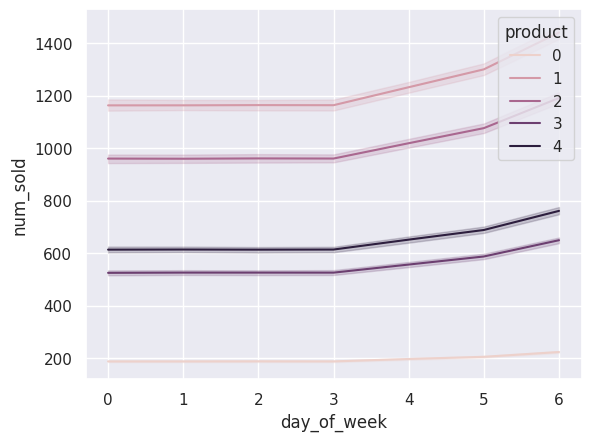

In [54]:
sns.set_theme()
# plt.(train_preprocess['day_of_week'],train_preprocess['num_sold'],bins=5)
sns.lineplot(x="day_of_week", y="num_sold",hue="product", data=train_preprocess)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='day_of_week', ylabel='num_sold'>

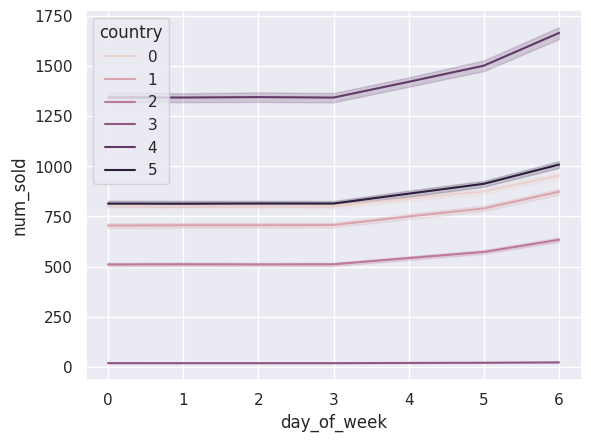

In [55]:
sns.lineplot(x="day_of_week", y="num_sold",hue="country", data=train_preprocess)

In [56]:
train_preprocess = train_preprocess.drop('date',axis=1)

In [67]:
train_preprocess = train_preprocess.dropna()

In [68]:
train_preprocess.head()

,id,country,store,product,num_sold,year,month,day,day_of_week
1,1,0,0,1,973.0,2010,1,1,4
2,2,0,0,2,906.0,2010,1,1,4
3,3,0,0,3,423.0,2010,1,1,4
4,4,0,0,4,491.0,2010,1,1,4
5,5,0,2,0,300.0,2010,1,1,4


In [69]:
from sklearn.model_selection import train_test_split
y = train_preprocess.num_sold
X = train_preprocess.drop(['num_sold'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=4234201)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((165944, 8), (55315, 8), (165944,), (55315,))

In [70]:
X_train

,id,country,store,product,year,month,day,day_of_week
102114,102114,3,2,4,2013,2,8,4
178186,178186,5,0,1,2015,6,3,2
53102,53102,0,0,2,2011,8,14,6
9001,9001,0,0,1,2010,4,11,6
124050,124050,2,0,0,2013,10,10,3
...,...,...,...,...,...,...,...,...
176889,176889,2,2,4,2015,5,20,2
211620,211620,2,0,0,2016,6,9,3
63549,63549,0,2,4,2011,12,8,3
117051,117051,3,2,1,2013,7,24,2


In [71]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(X_train, y_train)
lin_reg.score(X_train, y_train), lin_reg.score(X_test, y_test)

(0.08153985891832594, 0.0814592465656353)

In [72]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(
    PolynomialFeatures(2), LinearRegression()
)
pipe.fit(X_train, y_train).score(X_test, y_test)

0.33178413599198087

In [101]:
preds = pipe.predict(test_preprocess)

In [105]:
len(preds),len(test_preprocess)

(98550, 98550)

### Create DataFrame

In [103]:
results = pd.DataFrame()

In [106]:
results['id'] = test_preprocess.id

In [107]:
results['num_sold'] = preds

In [108]:
results

,id,num_sold
0,230130,139.260333
1,230131,623.738513
2,230132,803.976305
3,230133,679.973711
4,230134,251.730730
...,...,...
98545,328675,573.452817
98546,328676,1052.680834
98547,328677,1227.668465
98548,328678,1098.415709


In [109]:
results.to_csv("result_01.csv")